## Dataset Description
Fashion-MNIST – аналог знаменитого датасета MNIST, который состоит не из рукописных символов, а из предметов одежды. Он был создан, чтобы актуализировать учебные задачи в компьютерном зрении и приблизить их к реальности.

Решение более сложной постановки этой задачи может использоваться, например, в маркетплейсах. Покупателю могут рекомендоваться товары по изображениям в соответствии с введённым описанием. Продавцу при загрузке изображений в карточку товара могут автоматически рекомендоваться теги и описание предмета одежды.

Каждое изображение представляет собой набор их 784 пикселей (28x28). Каждый пиксель принимает значение от 0 до 255, обозначая его цвет в черно-белой шкале. Обучающая выборка содержит 786 столбцов, где первый (label) – принадлежность изображения к классу, а последний – его уникальный номер (id). Остальные столбцы – пиксели изображения.
Проведите первичный анализ данных, чтобы определить наличие NaN значений.
Тестовая выборка (на основе которой должно быть получено исследование) содержит все те же столбцы, кроме label.

Расшифровка классов (label), к которым принадлежат изображения:

- 0 T-shirt/top – футболка
- 1 Trouser – брюки
- 2 Pullover – свитер
- 3 Dress – платье
- 4 Coat – пальто
- 5 Sandal – сандалия
- 6 Shirt – рубашка
- 7 Sneaker – кроссовок
- 8 Bag – сумка
- 9 Ankle boot – сапог

Структура данных:

fmnist_train.csv – обучающая выборка
fmnist_test.csv – тестовая выборка (на которой должно быть получено предсказание)
sample_submission.csv – пример решения

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.losses import categorical_crossentropy
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
from tensorflow.keras import backend as K


In [55]:
from tensorflow.keras.models import load_model

In [3]:
import pandas as pd
from keras.utils import to_categorical

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_train.csv')

In [6]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037
17038,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17038


In [7]:
df.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Id          0
Length: 786, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB


In [9]:
def replace_nan_with_zero(dataset):
    """
    Заменяет все значения NaN в датасете на нули.
    
    Аргументы:
    dataset -- датасет pandas
    
    Возвращает:
    Новый датасет с замененными значениями NaN на нули.
    """
    return dataset.fillna(0)

In [10]:
# Заменяем значения NaN на нули
df = replace_nan_with_zero(df)

In [11]:
train_images = df[df.columns[1:-1]].values
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
train_images.shape

(17040, 784)

In [13]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [14]:
labels = df['label'].values

In [15]:
labels

array([2, 9, 6, ..., 4, 6, 5])

In [17]:
#seed = 50

In [18]:
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.2, random_state=50, shuffle=True)

In [19]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [20]:
X_train.shape

(13632, 28, 28, 1)

In [21]:
X_test.shape

(3408, 28, 28, 1)

In [22]:
# Нормализация данных
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [23]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [42]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', strides=1, padding='same'))
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu', strides=1, padding='same')) 
model.add(Dropout(0.21))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(518, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [39]:
checkpoint = ModelCheckpoint('weights_epoch_{epoch:02d}.h5', 
                             monitor='val_accuracy', 
                             save_weights_only=True, 
                             save_best_only=False, 
                             save_freq='epoch')


In [44]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
model.fit(x=X_train, y=y_train,epochs=50, batch_size=36, verbose=1, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/50
379/379 [==============================] - 8s 15ms/step - loss: 0.5918 - accuracy: 0.7844 - val_loss: 0.3741 - val_accuracy: 0.8636
Epoch 2/50
379/379 [==============================] - 5s 14ms/step - loss: 0.3592 - accuracy: 0.8694 - val_loss: 0.3417 - val_accuracy: 0.8762
Epoch 3/50
379/379 [==============================] - 5s 14ms/step - loss: 0.2805 - accuracy: 0.8971 - val_loss: 0.2949 - val_accuracy: 0.9014
Epoch 4/50
379/379 [==============================] - 5s 14ms/step - loss: 0.2285 - accuracy: 0.9140 - val_loss: 0.2928 - val_accuracy: 0.8947
Epoch 5/50
379/379 [==============================] - 6s 15ms/step - loss: 0.1839 - accuracy: 0.9300 - val_loss: 0.2818 - val_accuracy: 0.9026
Epoch 6/50
379/379 [==============================] - 5s 14ms/step - loss: 0.1533 - accuracy: 0.9449 - val_loss: 0.2849 - val_accuracy: 0.9043
Epoch 7/50
379/379 [==============================] - 5s 14ms/step - loss: 0.1258 - accuracy: 0.9528 - val_loss: 0.2900 - val_accuracy: 0.9096

In [43]:
K.clear_session()

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2080      
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                      

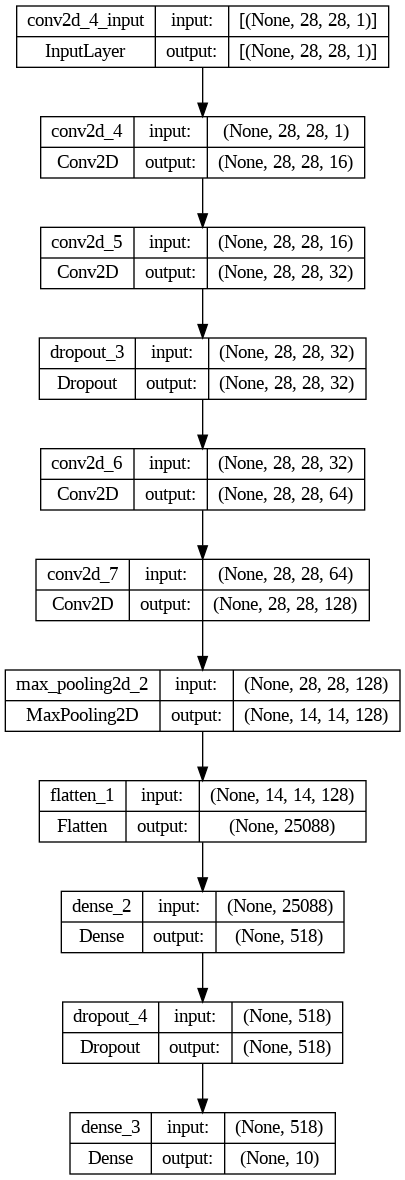

In [67]:
plot_model(model, show_shapes = True)

In [48]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

107/107 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.9114
Loss: 0.48
Accuracy: 0.91


In [49]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_test.csv')

In [50]:
test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,9995
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,9996
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,9997
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9998


In [51]:
test = test.drop(test.columns[-1], axis=1)
test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
pred_images = test.values
pred_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
pred_images.shape

(10000, 784)

In [54]:
pred_images = pred_images.reshape((-1, 28, 28, 1))

In [55]:
pred_images = pred_images.astype("float32")/255

In [56]:
model.load_weights('/content/weights_epoch_13.h5')  
predictions = model.predict(X_test)

107/107 [==============================] - 0s 3ms/step


In [57]:
test_pred = model.predict(pred_images)
pred_classes = np.argmax(test_pred,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [58]:
test_pred.shape

(10000, 10)

In [60]:
predicted_labels = np.argmax(test_pred, axis=1)

# Создание DataFrame из предсказанных меток
result = pd.DataFrame({'Category': predicted_labels})

print(result)

      Category
0            0
1            1
2            2
3            2
4            3
...        ...
9995         0
9996         6
9997         8
9998         8
9999         1

[10000 rows x 1 columns]


In [61]:
result = result.reset_index(drop=False)

In [62]:
result.columns = ['Id','Category']

In [63]:
result

,Id,Category
0,0,0
1,1,1
2,2,2
3,3,2
4,4,3
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8


In [65]:
result.to_csv('Simonova_AI.12_submission.csv', index=False)


In [68]:
model.save('fashion_mnist_model.h5')